For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor we would want to invest in people who showed a profile of having a high probability of paying us back. We will try to create a model that will help predict this.
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Load the Data

In [2]:
loans = pd.read_csv(r"C:\Users\Anugya\Downloads\Py_DS_ML_Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\15-Decision-Trees-and-Random-Forests\loan_data.csv")

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [5]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [6]:
num_col = loans.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = loans.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)



Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: 
 Index(['purpose'], dtype='object')


# Exploratory Data Analysis

Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.



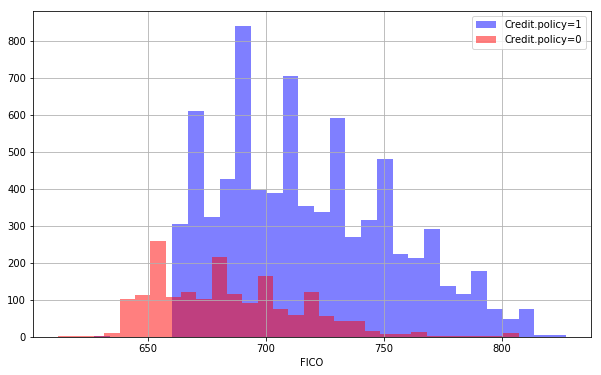

In [9]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha = 0.5, color ='blue',bins =30, label = 'Credit.policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha = 0.5, color ='red',bins =30, label = 'Credit.policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

Histogram of not.fully.paid column

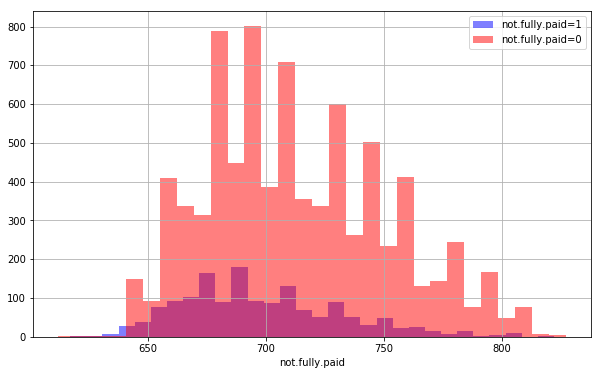

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5, color ='blue',bins =30, label = 'not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.5, color ='red',bins =30, label = 'not.fully.paid=0')
plt.legend()
plt.xlabel('not.fully.paid')
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

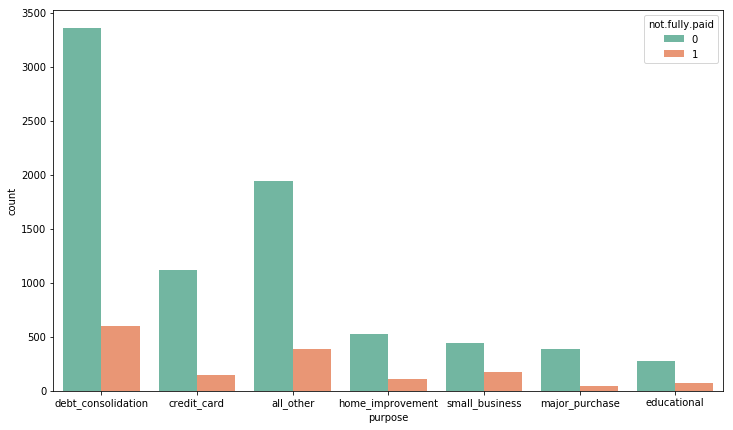

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set2')
plt.show()

**Trend between FICO score and interest rate. Recreate the following jointplot.**

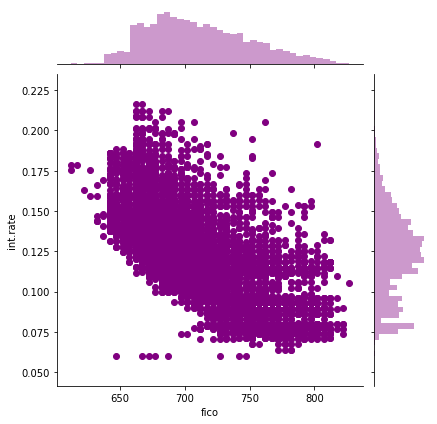

In [15]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')
plt.show()

**lmplots to see if the trend differed between not.fully.paid and credit.policy**

<Figure size 792x504 with 0 Axes>

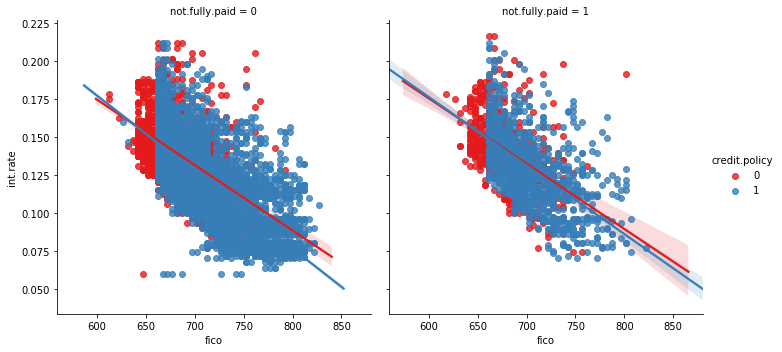

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.show()

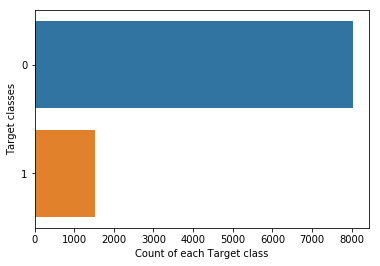

In [26]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=loans['not.fully.paid'] ,data=loans)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

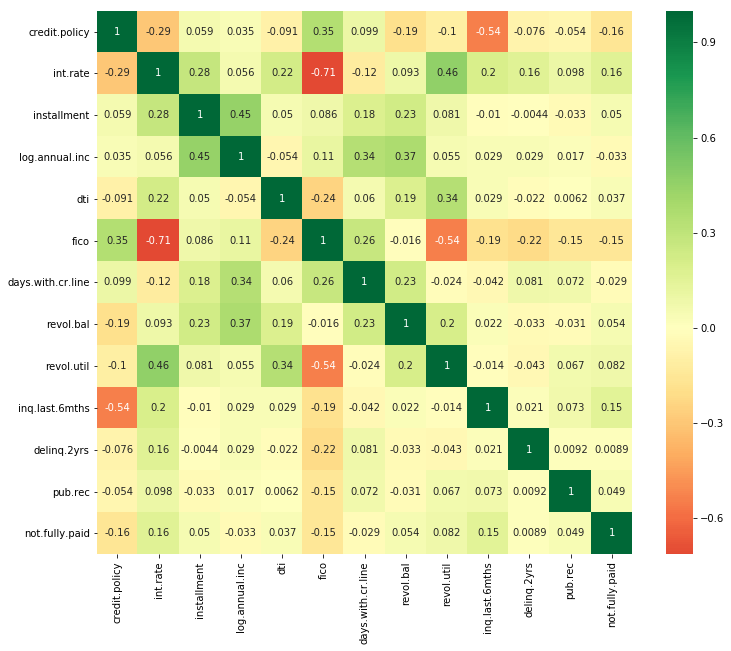

In [31]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(12,10))
p=sns.heatmap(loans.corr(), annot=True,cmap='RdYlGn',center=0) 

# Data Preprocessing

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [20]:
cat_feats = ['purpose']

In [21]:
final_data = pd.get_dummies(data=loans,columns = cat_feats, drop_first = True)

In [22]:
final_data.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  \
count     9578.000000  9578.000000  9578.000000     9578.000000   
mean         1.577469     0.163708     0.062122        0.160054   
std          2.200245     0.546215     0.262126        0.366676   
min          0.000000     0.000000     0.000000        0.000000   
25%          0.000000     0.000000     0.000000        0.000000   
50%          1.000000     0.000000     0.000000        0.000000   
75%          2.000000     0.000000     0.000000        0.000000   
max         33.000000    13.000000     5.000000        1.000000   

       purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
count          9578.000000                 9578.000000          9578.000000   
mean              0.131760                    0.413134             0.035811   
std               0.338248                    0.492422             0.185829   
min               0.000000                    0.000000             0.000000   
25%               0.000000                    0.000000             0.000000   
50%               0.000000                    0.000000             0.000000   
75%               0.000000                    1.000000             0.000000   
max               1.000000                    1.000000             1.000000   

       purpose_home_improvement  purpose_major_purchase  \
count               9578.000000             9578.000000   
mean                   0.065671                0.045625   
std                    0.247720                0.208682   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                0.000000   
max                    1.000000                1.000000   

       purpose_small_business  
count             9578.000000  
mean                 0.064627  
std                  0.245880  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

In [23]:
print(final_data.isna().sum())

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64


## Train Test Split

Now its time to split our data into a training set and a testing set.

In [35]:
X = final_data.drop('not.fully.paid', axis =1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model
### Decision Tree with criterion = gini

In [36]:
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2007  424]
 [ 340  103]]

 Accuracy Score : 
  0.7341684064022269

 Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



### Decision Tree with criterion = entropy

In [37]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2010  421]
 [ 350   93]]

 Accuracy Score : 
  0.7317327766179541

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.18      0.21      0.19       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Handle class imbalance

The class 1 is very less, hence we need to handle the class imbalance by oversampling

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros =RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X,y)

y_ros.value_counts()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=500)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [39]:
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1974  514]
 [  45 2294]]

 Accuracy Score : 
  0.8841930805883571

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      2488
           1       0.82      0.98      0.89      2339

    accuracy                           0.88      4827
   macro avg       0.90      0.89      0.88      4827
weighted avg       0.90      0.88      0.88      4827



## Decision Tree Visualization

In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

C:\Users\Anugya\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [48]:
features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [49]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Using GridSearchCV Method

In [51]:
dtree = DecisionTreeClassifier()
# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth': [10,15,20,30,40,50]}  
  
grid = GridSearchCV(dtree, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.698, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.702, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=10, score=0.681, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.694, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.705, total=   0.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.802, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.784, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.783, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [52]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 40}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [53]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[1974  514]
 [  42 2297]]

 Accuracy Score : 
  0.8848145846281334

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      2488
           1       0.82      0.98      0.89      2339

    accuracy                           0.88      4827
   macro avg       0.90      0.89      0.88      4827
weighted avg       0.90      0.88      0.88      4827



## Training the Random Forest model


In [56]:
clf = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1894  594]
 [ 454 1885]]

 Accuracy Score : 
  0.782887922104827

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      2488
           1       0.76      0.81      0.78      2339

    accuracy                           0.78      4827
   macro avg       0.78      0.78      0.78      4827
weighted avg       0.78      0.78      0.78      4827



In [57]:
rf = RandomForestClassifier()

# defining parameter range 
param_grid = { 'max_depth'   : [10,20,40],
               'n_estimators' : [100,200,300]
             }  
  
  
grid = GridSearchCV(rf, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.749, total=   0.8s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.769, total=   0.9s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.773, total=   0.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.773, total=   0.9s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.767, total=   0.8s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.752, total=   1.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.777, total=   1.7s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.782, total=   1.7s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.771, total=   1.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [59]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'max_depth': 40, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [60]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[2345  143]
 [  51 2288]]

 Accuracy Score : 
  0.9598094054278019

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2488
           1       0.94      0.98      0.96      2339

    accuracy                           0.96      4827
   macro avg       0.96      0.96      0.96      4827
weighted avg       0.96      0.96      0.96      4827



Random Forest after Grid search performed much better than Decision Trees with optimum parameters. 